## Password Analysis Project

### Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as seabornInstance 
from pywaffle import Waffle

### Loading the datasets to pandas data frames

* In this step we load all our passwords lists to pandas dataframes

In [2]:
pass_list1 = pd.read_csv('Data/yahoo.txt',sep='delimiter', header = None,engine='python')
pass_list2 = pd.read_csv('Data/hotmail.txt',sep='delimiter', header = None,engine='python')
pass_list3 = pd.read_csv('Data/netflix.txt',sep='delimiter', header = None,engine='python')

* Now we concat all password lists and create a new dataframe called password_list that contains all passwords using the following command.

In [3]:
password_list=pd.concat([pass_list1,pass_list2,pass_list3],ignore_index=True)

In [4]:
password_list.head()
type(password_list)

pandas.core.frame.DataFrame

* Now we will convert all the passwords to lowercase characters for our analysis part using the following command.

In [5]:
new_password_list=password_list[0].str.lower()

### Load the other datasets
* In this step we load the other datasets that are going to be part of the data analysis.
* The other loaded datasets are:
1. Dictionary Words
2. Places
3. Names
4. Keyboard Patterns

* Now we will present a little bit more explanations about the datasets:
#### Dictionary Words:
The dictionary words consists of 58108 unique english dictionary words. The words were obtained from the following link:
http://www.mieliestronk.com/corncob_lowercase.txt

#### Places:
The places dataset consists of all country names, all city names, all states names and all street names. The dataset contains 96208 unique place. The dataset was obtained from the following links:
1. https://inventwithpython.com/blog/2011/09/28/list-of-street-names-list-of-last-names/
2. https://simplemaps.com/data/world-cities
3. https://gist.github.com/kalinchernev/486393efcca01623b18d
4. https://github.com/dr5hn/countries-states-cities-database

#### Names
The names dataset consists of all first and last names. It consists of 225706 unique names. The names were obtained from the following link:
https://github.com/philipperemy/name-dataset/tree/master/names_dataset

#### Keyboard patterns
The keyboard pattern consists of all keyboard patterns. This dataset consists of 647 unique keyboard patterns. The dataset was obtained from the following link:
https://docs.google.com/viewer?a=v&pid=sites&srcid=ZGVmYXVsdGRvbWFpbnxyZXVzYWJsZXNlY3xneDo0ODVmMWY1ZjE0ZDk3Yzc2



In [6]:
english_words = pd.read_csv('Data/Dictionary_Words.txt', header = None,engine='python')
places = pd.read_csv('Data/Places.txt',sep='delimiter', header = None,engine='python')
names= pd.read_csv('Data/names.txt',sep='delimiter', header = None,engine='python')
keyboard_patterns= pd.read_csv('Data/keyboard_dic.txt',sep='delimiter', header = None,engine='python')

In [7]:
print(english_words.shape)
print(names.shape)
print(places.shape)

(58110, 1)
(262214, 1)
(96652, 1)


* Now we are going to remove the duplicates from our dataframes using the following commands:

In [8]:
english_words.drop_duplicates(inplace=True)
places.drop_duplicates(inplace=True)
names.drop_duplicates(inplace=True)
keyboard_patterns.drop_duplicates(inplace=True)

In [9]:
print(english_words.shape)
print(names.shape)
print(places.shape)
print(keyboard_patterns.shape)

(58109, 1)
(225706, 1)
(96208, 1)
(647, 1)


* Change all the dataframes to lowercase characters

In [10]:
english_words[0].str.lower()
names[0].str.lower()
keyboard_patterns[0].str.lower()
places=places[0].str.lower();
places=pd.DataFrame(places)

In [11]:
english_words=english_words[[(len(str(x)) >=4) for x in english_words[0]]]
names=names[[(len(str(x)) >=4) for x in names[0]]]
places=places[[(len(str(x)) >=4) for x in places[0]]]
#english_words=english_words[english_words[0].map(len) >= 3]
#names=names[names[0].map(len) >= 3]
#places=places[places[0].map(len) >=3]

### Intersection between Words on different dataframes

In [12]:
words_names=pd.concat([names,english_words],ignore_index=True)
words_places=pd.concat([places,english_words],ignore_index=True)
names_places=pd.concat([names,places],ignore_index=True)

In [13]:
# making a bool series 
#bool_series = names_places[0].duplicated() 
  
# display data 
#names_places[bool_series] 

### Dropping all the duplicates from all dataframes

In [14]:
all_lists=pd.concat([names,places,english_words],ignore_index=True)

In [15]:
all_lists.shape

(377283, 1)

In [16]:
all_lists.drop_duplicates(inplace=True)

In [17]:
all_lists.shape

(348524, 1)

In [18]:
type(all_lists)

pandas.core.frame.DataFrame

In [19]:
all_lists.nunique()

0    348524
dtype: int64

In [20]:
# def getIndexes(dfObj, value):
#     ''' Get index positions of value in dataframe i.e. dfObj.'''
 
#     listOfPos = list()
#     # Get bool dataframe with True at positions where the given value exists
#     result = dfObj.isin([value])
#     # Get list of columns that contains the value
#     seriesObj = result.any()
#     columnNames = list(seriesObj[seriesObj == True].index)
#     # Iterate over list of columns and fetch the rows indexes where value exists
#     for col in columnNames:
#         rows = list(result[col][result[col] == True].index)
#         for row in rows:
#             listOfPos.append((row, col))
#     # Return a list of tuples indicating the positions of value in the dataframe
#     return listOfPos
# getIndexes(all_lists,'zylonite')

In [21]:
nam=all_lists.loc[0:224097]

In [22]:
plac=all_lists.loc[224098:319809]

In [23]:
words=all_lists.loc[319810:]

In [24]:
#new_password_list[new_password_list.index.duplicated()]
#new_password_list = new_password_list[~new_password_list.index.duplicated()]
#new_password_list.shape

In [25]:
new_password_list=pd.DataFrame(new_password_list)

In [26]:
len(new_password_list)

454482

* Count all keyboard patterns

In [27]:
passwords=new_password_list.copy()
count_keys=0
passwords_with_keys=pd.DataFrame()
for i in keyboard_patterns.index.tolist():
    password_words=passwords[passwords[0].str.contains(str(keyboard_patterns[0][i]),regex=False)]
    if(len(password_words)>0):
        passwords_with_keys=passwords_with_keys.append(password_words,ignore_index=True)
        count_keys+=len(password_words)
        passwords=passwords[~passwords[0].str.contains(str(keyboard_patterns[0][i]),regex=False)]

print(count_keys)

37020


0.08


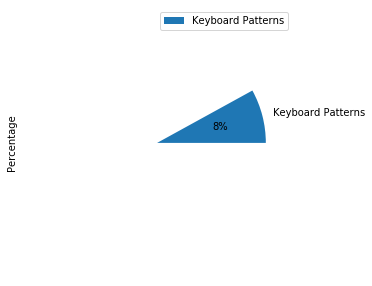

In [28]:
percent=count_keys/len(new_password_list)
percent=round(percent,2)
percent_keyboard=percent*100
print(percent)
df1 = pd.DataFrame({'Percentage': [percent]},index=['Keyboard Patterns'])
plot = df1.plot.pie(y='Percentage', figsize=(5, 5),autopct='%.0f%%')

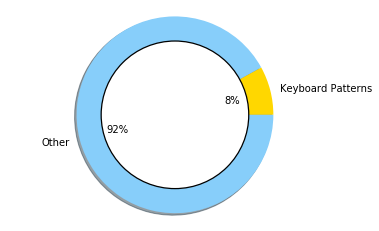

In [29]:
labels = 'Keyboard Patterns', 'Other' 
sizes = [8,92] 
colors = ['gold', 'lightskyblue'] 
explode = (0, 0)  # explode a slice if required 
 
 
plt.pie(sizes, explode=explode, labels=labels, colors=colors, 
         autopct='%1.0f%%', shadow=True) 
          
#draw a circle at the center of pie to make it look like a donut 
centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.25) 
fig = plt.gcf() 
fig.gca().add_artist(centre_circle) 

# Set aspect ratio to be equal so that pie is drawn as a circle. 
plt.axis('equal') 
plt.show()   

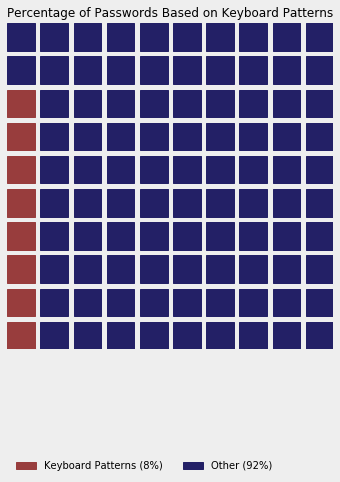

In [30]:
data = {'Keyboard Patterns': 8, 'Other': 92}
fig = plt.figure(
    FigureClass=Waffle, 
    rows=10, 
    values=data, 
    colors=("#983D3D", "#232066"),
    title={'label': 'Percentage of Passwords Based on Keyboard Patterns', 'loc': 'left'},
    labels=["{0} ({1}%)".format(k, v) for k, v in data.items()],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0},
    #plot_direction='NW',
    tight=False,
    figsize=(9, 6)
)
fig.set_facecolor('#EEEEEE')
plt.show()

* Count all passwords that contain english words

In [31]:
count_words=0
passwords_with_words=pd.DataFrame()
for i in words.index.tolist():
    password_words=passwords[passwords[0].str.contains(str(words[0][i]),regex=False)]
    if(len(password_words)>0):
        passwords_with_words=passwords_with_words.append(password_words,ignore_index=True)
        count_words+=len(password_words)
        passwords=passwords[~passwords[0].str.contains(str(words[0][i]),regex=False)]

print(count_words)

96316


0.21


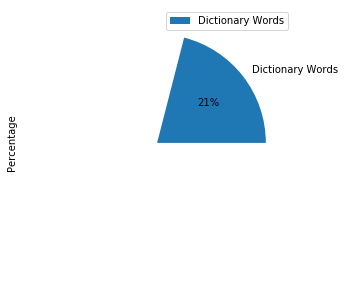

In [32]:
count=count_words
percent=count/len(new_password_list)
percent=round(percent,2)
percent_words=percent*100
print(percent)
df1 = pd.DataFrame({'Percentage': [percent]},index=['Dictionary Words'])
plot = df1.plot.pie(y='Percentage', figsize=(5, 5),autopct='%.0f%%')

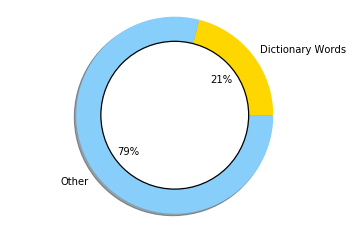

In [33]:
labels = 'Dictionary Words', 'Other' 
sizes = [21,79] 
colors = ['gold', 'lightskyblue'] 
explode = (0, 0)  # explode a slice if required 
 
 
plt.pie(sizes, explode=explode, labels=labels, colors=colors, 
         autopct='%1.0f%%', shadow=True) 
          
#draw a circle at the center of pie to make it look like a donut 
centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.25) 
fig = plt.gcf() 
fig.gca().add_artist(centre_circle) 

# Set aspect ratio to be equal so that pie is drawn as a circle. 
plt.axis('equal') 
plt.show()   

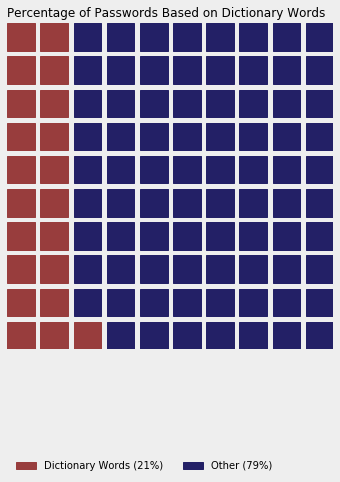

In [34]:
data = {'Dictionary Words': 21, 'Other': 79}
fig = plt.figure(
    FigureClass=Waffle, 
    rows=10, 
    values=data, 
    colors=("#983D3D", "#232066"),
    title={'label': 'Percentage of Passwords Based on Dictionary Words', 'loc': 'left'},
    labels=["{0} ({1}%)".format(k, v) for k, v in data.items()],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0},
    #plot_direction='NW',
    tight=False,
    figsize=(9, 6)
)
fig.set_facecolor('#EEEEEE')
plt.show()

* Count all places

In [35]:
count_places=0
passwords_with_places=pd.DataFrame()
for i in plac.index.tolist():
    password_words=passwords[passwords[0].str.contains(str(plac[0][i]),regex=False)]
    if(len(password_words)>0):
        passwords_with_places=passwords_with_places.append(password_words,ignore_index=True)
        count_places+=len(password_words)
        passwords=passwords[~passwords[0].str.contains(str(plac[0][i]),regex=False)]

print(count_places)

80565


0.18


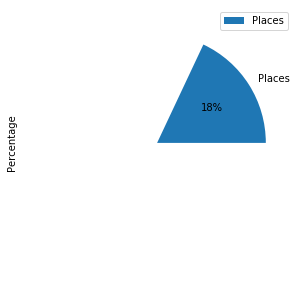

In [36]:
percent=count_places/len(new_password_list)
percent=round(percent,2)
percent_places=percent*100
print(percent)
df1 = pd.DataFrame({'Percentage': [percent]},index=['Places'])
plot = df1.plot.pie(y='Percentage', figsize=(5, 5),autopct='%.0f%%')

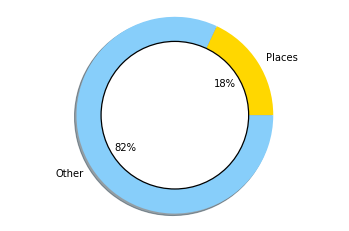

In [37]:
labels = 'Places', 'Other' 
sizes = [18,82] 
colors = ['gold', 'lightskyblue'] 
explode = (0, 0)  # explode a slice if required 
 
 
plt.pie(sizes, explode=explode, labels=labels, colors=colors, 
         autopct='%1.0f%%', shadow=True) 
          
#draw a circle at the center of pie to make it look like a donut 
centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.25) 
fig = plt.gcf() 
fig.gca().add_artist(centre_circle) 

# Set aspect ratio to be equal so that pie is drawn as a circle. 
plt.axis('equal') 
plt.show()   

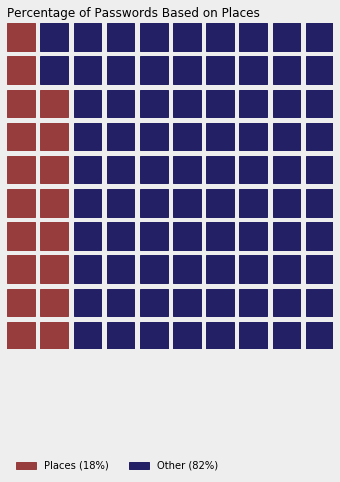

In [38]:
data = {'Places': 18, 'Other': 82}
fig = plt.figure(
    FigureClass=Waffle, 
    rows=10, 
    values=data, 
    colors=("#983D3D", "#232066"),
    title={'label': 'Percentage of Passwords Based on Places', 'loc': 'left'},
    labels=["{0} ({1}%)".format(k, v) for k, v in data.items()],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0},
    #plot_direction='NW',
    tight=False,
    figsize=(9, 6)
)
fig.set_facecolor('#EEEEEE')
plt.show()

* Count all names

In [39]:
count_names=0
passwords_with_names=pd.DataFrame()
for i in nam.index.tolist():
    password_words=passwords[passwords[0].str.contains(str(nam[0][i]),regex=False)]
    if(len(password_words)>0):
        passwords_with_names=passwords_with_names.append(password_words,ignore_index=True)
        count_names+=len(password_words)
        passwords=passwords[~passwords[0].str.contains(str(nam[0][i]),regex=False)]

print(count_names)

129074


0.28


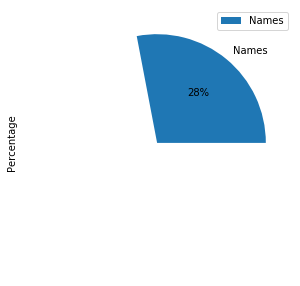

In [40]:
percent=count_names/len(new_password_list)
percent=round(percent,2)
percent_names=percent*100
print(percent)
df1 = pd.DataFrame({'Percentage': [percent]},index=['Names'])
plot = df1.plot.pie(y='Percentage', figsize=(5, 5),autopct='%.0f%%')

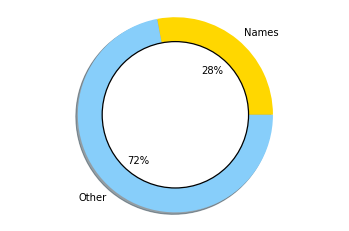

In [41]:
labels = 'Names', 'Other' 
sizes = [28,72] 
colors = ['gold', 'lightskyblue'] 
explode = (0, 0)  # explode a slice if required 
 
 
plt.pie(sizes, explode=explode, labels=labels, colors=colors, 
         autopct='%1.0f%%', shadow=True) 
          
#draw a circle at the center of pie to make it look like a donut 
centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.25) 
fig = plt.gcf() 
fig.gca().add_artist(centre_circle) 

# Set aspect ratio to be equal so that pie is drawn as a circle. 
plt.axis('equal') 
plt.show()   

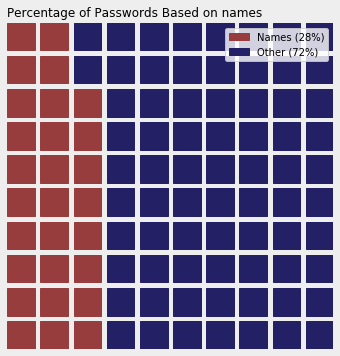

In [42]:
data = {'Names': 28, 'Other': 72}
fig = plt.figure(
    FigureClass=Waffle, 
    rows=10, 
    values=data, 
    colors=("#983D3D", "#232066"),
    title={'label': 'Percentage of Passwords Based on names', 'loc': 'left'},
    labels=["{0} ({1}%)".format(k, v) for k, v in data.items()],
    #legend={''loc': 'upper left', bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0},
    #plot_direction='NW',
    tight=False,
    figsize=(9, 6)
)
fig.set_facecolor('#EEEEEE')
plt.show()

* Count all numeric passwords

0.05


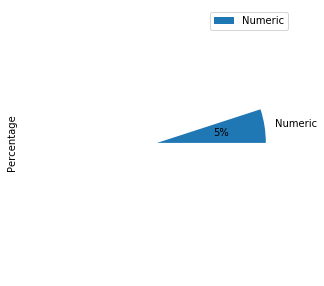

In [43]:
# Script for counting all numeric passwords in list
numeric_passwords=pd.DataFrame()
passwords_with_numbers=passwords[passwords[0].str.isnumeric()]
numeric_passwords=numeric_passwords.append(passwords_with_numbers,ignore_index=True)
#count_numeric=passwords[0].str.isnumeric().sum()
count_numeric=len(numeric_passwords)
percent=count_numeric/len(new_password_list)
percent_numbers=percent*100
percent=round(percent,2)
print(percent)
df1 = pd.DataFrame({'Percentage': [percent]},index=['Numeric'])
plot = df1.plot.pie(y='Percentage', figsize=(5, 5),autopct='%.0f%%')

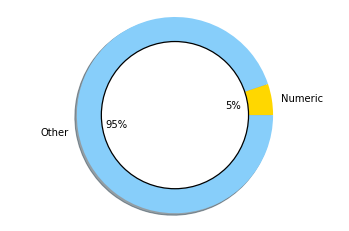

In [44]:
labels = 'Numeric', 'Other' 
sizes = [5,92] 
colors = ['gold', 'lightskyblue'] 
explode = (0, 0)  # explode a slice if required 
 
 
plt.pie(sizes, explode=explode, labels=labels, colors=colors, 
         autopct='%1.0f%%', shadow=True) 
          
#draw a circle at the center of pie to make it look like a donut 
centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.25) 
fig = plt.gcf() 
fig.gca().add_artist(centre_circle) 

# Set aspect ratio to be equal so that pie is drawn as a circle. 
plt.axis('equal') 
plt.show()   

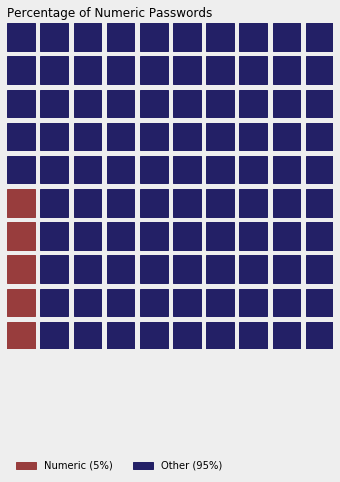

In [45]:
data = {'Numeric': 5, 'Other': 95}
fig = plt.figure(
    FigureClass=Waffle, 
    rows=10, 
    values=data, 
    colors=("#983D3D", "#232066"),
    title={'label': 'Percentage of Numeric Passwords', 'loc': 'left'},
    labels=["{0} ({1}%)".format(k, v) for k, v in data.items()],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0},
    #plot_direction='NW',
    tight=False,
    figsize=(9, 6)
)
fig.set_facecolor('#EEEEEE')
plt.show()

* These are the names of the dataframes contains the passwords
1. passwords_with_places
2. passwords_with_words
3. passwords_wtih_names
4. passwords_with_keys
5. numeric_passwords

### Analysis on passwords with english words

In [46]:
direct_words=passwords_with_words[[(x.isalpha()) for x in passwords_with_words[0]]]
words_with_numbers=passwords_with_words[[(x.isalnum() and not x.isalpha() and not x.isnumeric()) for x in passwords_with_words[0]]]
words_with_symbols=passwords_with_words[[(x and not x.isalnum() ) for x in passwords_with_words[0]]]
count_direct_words=len(direct_words)
count_words_with_numbers=len(words_with_numbers)
count_words_with_symbols=len(words_with_symbols)

* Plotting the percentage of direct english words

0.52


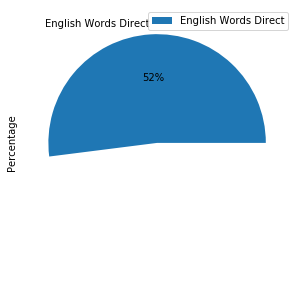

In [47]:
percent=count_direct_words/len(passwords_with_words)
percent=round(percent,2)
print(percent)
df1 = pd.DataFrame({'Percentage': [percent]},index=['English Words Direct'])
plot = df1.plot.pie(y='Percentage', figsize=(5, 5),autopct='%.0f%%')

* Plotting the percentage of english words with numbers

0.46


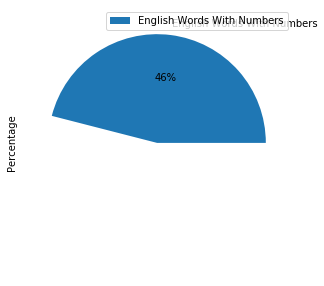

In [48]:
percent=count_words_with_numbers/len(passwords_with_words)
percent=round(percent,2)
print(percent)
df1 = pd.DataFrame({'Percentage': [percent]},index=['English Words With Numbers'])
plot = df1.plot.pie(y='Percentage', figsize=(5, 5),autopct='%.0f%%')

* Plotting the percentage of english words with symbols

0.02


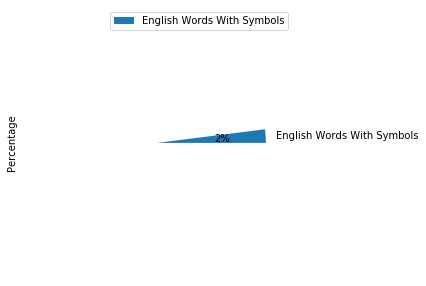

In [49]:
percent=count_words_with_symbols/len(passwords_with_words)
percent=round(percent,2)
print(percent)
df1 = pd.DataFrame({'Percentage': [percent]},index=['English Words With Symbols'])
plot = df1.plot.pie(y='Percentage', figsize=(5, 5),autopct='%.0f%%')

### Analysis on passwords with places

In [50]:
direct_places=passwords_with_places[[(x.isalpha()) for x in passwords_with_places[0]]]
places_with_numbers=passwords_with_places[[(x.isalnum() and not x.isalpha() and not x.isnumeric()) for x in passwords_with_places[0]]]
places_with_symbols=passwords_with_places[[(x and not x.isalnum() ) for x in passwords_with_places[0]]]
count_direct_places=len(direct_places)
count_places_with_numbers=len(places_with_numbers)
count_places_with_symbols=len(places_with_symbols)

* Plotting the percentage of direct places

0.46


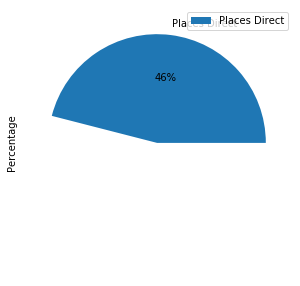

In [51]:
percent=count_direct_places/len(passwords_with_places)
percent=round(percent,2)
print(percent)
df1 = pd.DataFrame({'Percentage': [percent]},index=['Places Direct'])
plot = df1.plot.pie(y='Percentage', figsize=(5, 5),autopct='%.0f%%')

* Plotting the percentage of places with numbers

0.51


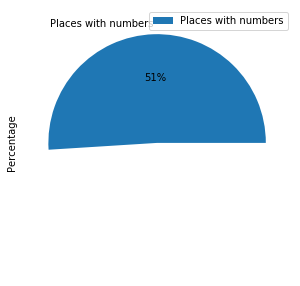

In [52]:
percent=count_places_with_numbers/len(passwords_with_places)
percent=round(percent,2)
print(percent)
df1 = pd.DataFrame({'Percentage': [percent]},index=['Places with numbers'])
plot = df1.plot.pie(y='Percentage', figsize=(5, 5),autopct='%.0f%%')

* Plotting the percentage of places with symbols

0.02


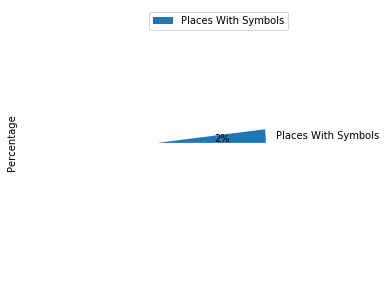

In [53]:
percent=count_places_with_symbols/len(passwords_with_places)
percent=round(percent,2)
print(percent)
df1 = pd.DataFrame({'Percentage': [percent]},index=['Places With Symbols'])
plot = df1.plot.pie(y='Percentage', figsize=(5, 5),autopct='%.0f%%')

### Analysis on passwords with names

In [54]:
direct_names=passwords_with_names[[(x.isalpha()) for x in passwords_with_names[0]]]
names_with_numbers=passwords_with_names[[(x.isalnum() and not x.isalpha() and not x.isnumeric()) for x in passwords_with_names[0]]]
names_with_symbols=passwords_with_names[[(not x.isalnum() ) for x in passwords_with_names[0]]]
count_direct_names=len(direct_names)
count_names_with_numbers=len(names_with_numbers)
count_names_with_symbols=len(names_with_symbols)

* Plotting the percentage of direct names

0.42


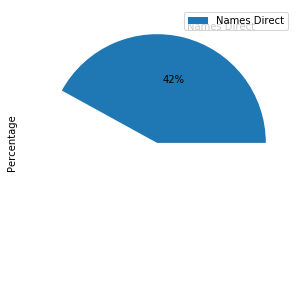

In [55]:
percent=count_direct_names/len(passwords_with_names)
percent=round(percent,2)
print(percent)
df1 = pd.DataFrame({'Percentage': [percent]},index=['Names Direct'])
plot = df1.plot.pie(y='Percentage', figsize=(5, 5),autopct='%.0f%%')

* Plotting the percentage of names with numbers

0.55


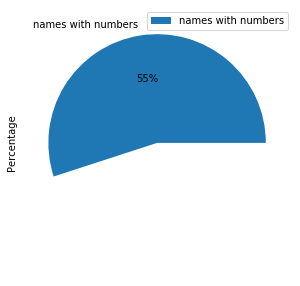

In [56]:
percent=count_names_with_numbers/len(passwords_with_names)
percent=round(percent,2)
print(percent)
df1 = pd.DataFrame({'Percentage': [percent]},index=['names with numbers'])
plot = df1.plot.pie(y='Percentage', figsize=(5, 5),autopct='%.0f%%')

* Plotting the percentage of names with symbols

0.02


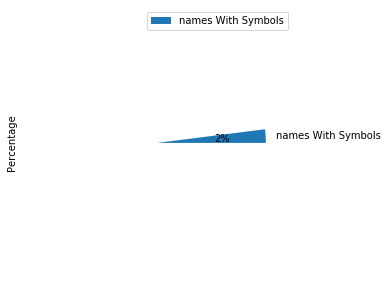

In [57]:
percent=count_names_with_symbols/len(passwords_with_names)
percent=round(percent,2)
print(percent)
df1 = pd.DataFrame({'Percentage': [percent]},index=['names With Symbols'])
plot = df1.plot.pie(y='Percentage', figsize=(5, 5),autopct='%.0f%%')

### Analysis on numeric passwords

* Finding different lengths used in numeric passwords

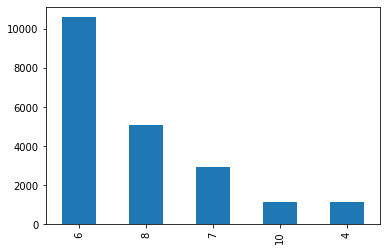

In [58]:
numeric_passwords['length']  = numeric_passwords[0].str.len()
numeric_passwords_count=pd.value_counts(numeric_passwords['length'])
numeric_passwords_count[0:5].plot.bar()

In [59]:
num_count=numeric_passwords_count


In [60]:
num_count=num_count.sort_index()

In [61]:
df=pd.DataFrame({'Length':num_count.index, 'Count':num_count.values})

In [62]:
df['Percent']=round(df['Count']/len(numeric_passwords)*100)

In [63]:
#plt.rcParams.update({'font.size': 12})

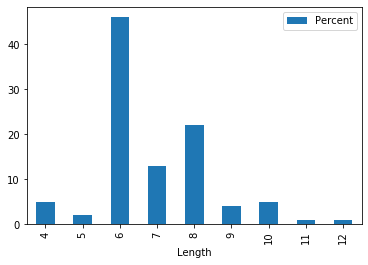

In [64]:
df[3:12].plot.bar(x='Length',y='Percent')

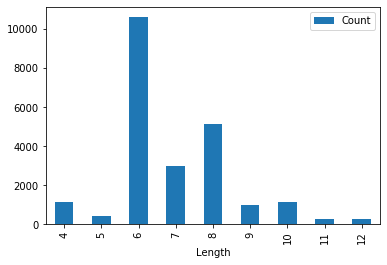

In [65]:
df[3:12].plot.bar(x='Length',y='Count')

In [66]:
numeric_passwords.head()

,0,length
0,10061971,8
1,122886,6
2,91316,5
3,6034907,7
4,052993,6


### Analysis on the remaining passwords that were not on any list

In [67]:
passwords=passwords[[(not x.isnumeric()) for x in passwords[0]]]

In [68]:
remaining_passwords=passwords.copy()

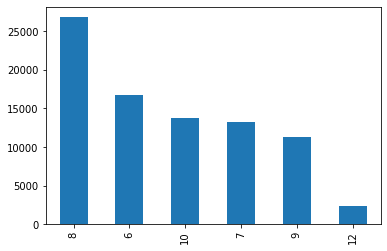

In [69]:
remaining_passwords['length']  = remaining_passwords[0].str.len()
remaining_passwords_count=pd.value_counts(remaining_passwords['length'])
remaining_passwords_count[0:6].plot.bar()

In [70]:
top_remaining_passwords=remaining_passwords.loc[remaining_passwords['length']==10]
top_remaining_passwords.head()

,0,length
0,@fl!pm0de@,10
217,guapoguapo,10
755,xiaephoe04,10
1143,hhmeacbiit,10
1615,may13thmoo,10


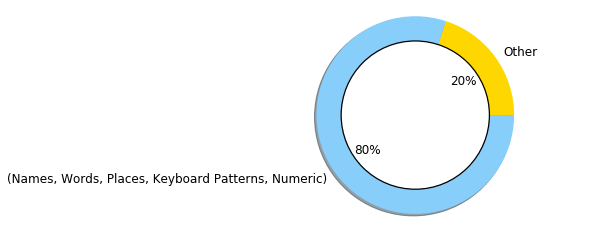

In [71]:
plt.rcParams.update({'font.size': 12})
labels = 'Other', '(Names, Words, Places, Keyboard Patterns, Numeric)'
sizes = [20,80] 
colors = ['gold', 'lightskyblue'] 
explode = (0, 0)  # explode a slice if required 
 
 
plt.pie(sizes, explode=explode, labels=labels, colors=colors, 
         autopct='%1.0f%%', shadow=True) 
          
#draw a circle at the center of pie to make it look like a donut 
centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.25) 
fig = plt.gcf() 
fig.gca().add_artist(centre_circle) 

# Set aspect ratio to be equal so that pie is drawn as a circle. 
plt.axis('equal') 
plt.show()   

### Analysis on the lengths of the passwords in the whole dataset

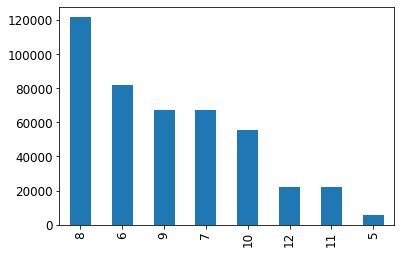

In [72]:
all_passwords=new_password_list.copy()
all_passwords['length']  = all_passwords[0].str.len()
all_passwords_count=pd.value_counts(all_passwords['length'])
all_passwords_count[0:8].plot.bar()

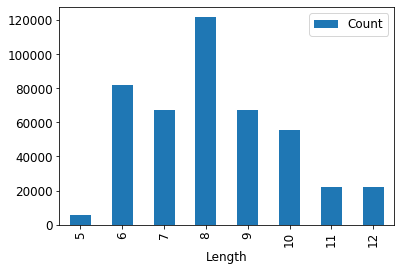

In [73]:
plt.rcParams.update({'font.size': 12})
all_count=all_passwords_count
all_count=all_count.sort_index()
df=pd.DataFrame({'Length':all_count.index, 'Count':all_count.values})
df[4:12].plot.bar(x='Length',y='Count')

In [74]:
df['Percent']=round(df['Count']/len(all_passwords)*100)

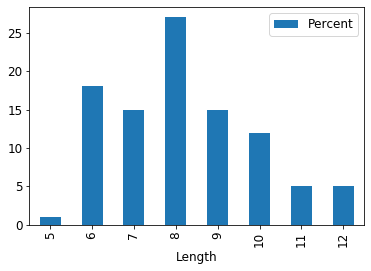

In [75]:
df[4:12].plot.bar(x='Length',y='Percent')

### Percentages of the passwords in the whole dataset

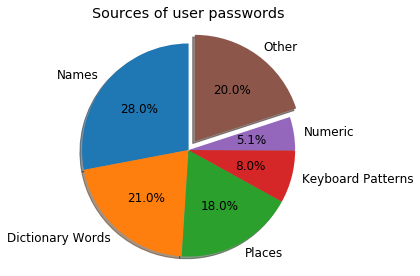

In [76]:
labels=['Names','Dictionary Words', 'Places','Keyboard Patterns', 'Numeric','Other']
sizes=[percent_names,percent_words,percent_places,percent_keyboard,percent_numbers,20]
#explode=[0.1,0.1,0.1,0.1,0.1,0.1]
explode=[0,0,0,0,0,0.1]
fig1, ax1=plt.subplots()
ax1.pie(sizes,explode=explode,labels=labels,autopct='%1.1f%%',shadow=True,startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
ax1.set(title='Sources of user passwords')
plt.tight_layout()
plt.show()

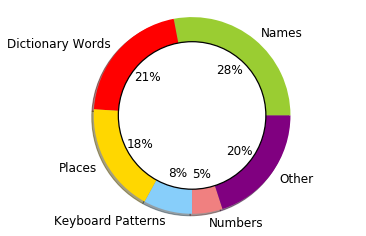

In [77]:
# The slices will be ordered and plotted counter-clockwise. 
labels = 'Names', 'Dictionary Words', 'Places', 'Keyboard Patterns', 'Numbers', 'Other' 
sizes = [28, 21, 18, 8, 5, 20] 
colors = ['yellowgreen','red', 'gold', 'lightskyblue', 'lightcoral','purple'] 
explode = (0, 0, 0, 0, 0, 0)  # explode a slice if required 
 
 
plt.pie(sizes, explode=explode, labels=labels, colors=colors, 
         autopct='%1.0f%%', shadow=True) 
          
#draw a circle at the center of pie to make it look like a donut 
centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.25) 
fig = plt.gcf() 
fig.gca().add_artist(centre_circle) 

# Set aspect ratio to be equal so that pie is drawn as a circle. 
plt.axis('equal') 
plt.show()   


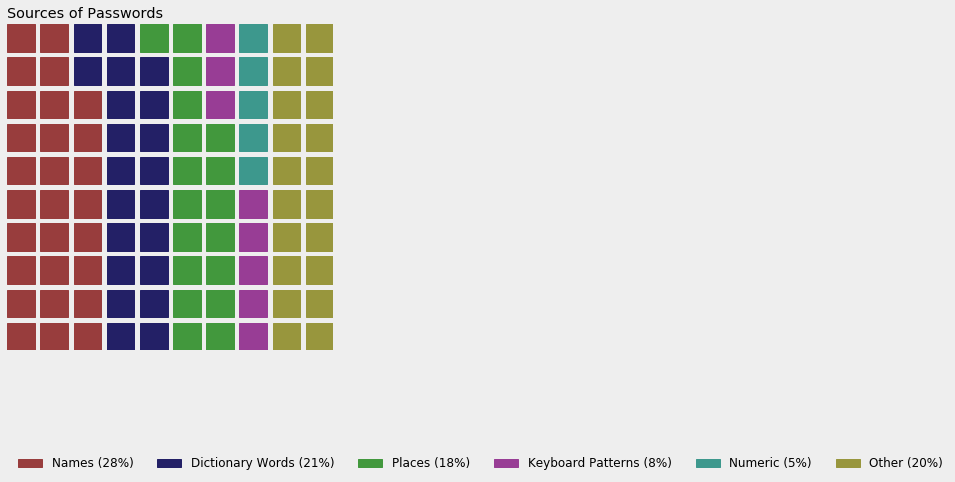

In [78]:
data = {'Names':round(percent_names),'Dictionary Words': round(percent_words),  "Places":round(percent_places) ,'Keyboard Patterns':round(percent_keyboard),'Numeric':round(percent_numbers),'Other':20}
fig = plt.figure(
    FigureClass=Waffle, 
    rows=10, 
    values=data, 
    colors=("#983D3D", "#232066","#42983d","#983d95","#3d988d","#98963d"),
    title={'label': 'Sources of Passwords', 'loc': 'left'},
    labels=["{0} ({1}%)".format(k, v) for k, v in data.items()],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0},
    #plot_direction='NW',
    tight=False,
    figsize=(9, 6)
)
fig.set_facecolor('#EEEEEE')
plt.show()

### English Words Percentages

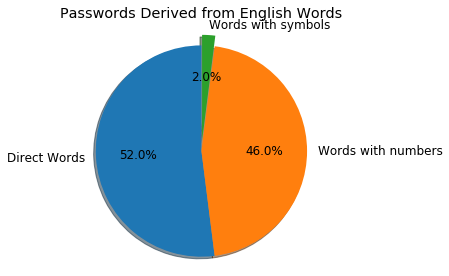

In [79]:
labels=['Direct Words','Words with numbers', 'Words with symbols']
sizes=[52,46,2]
#explode=[0.1,0.1,0.1,0.1,0.1,0.1]
explode=[0,0,0.1]
fig1, ax1=plt.subplots()
ax1.pie(sizes,explode=explode,labels=labels,autopct='%1.1f%%',shadow=True,startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
ax1.set(title='Passwords Derived from English Words')
plt.tight_layout()
plt.show()

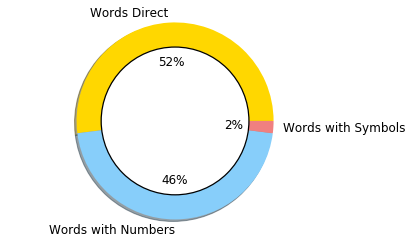

In [80]:
# The slices will be ordered and plotted counter-clockwise. 
labels = 'Words Direct', 'Words with Numbers', 'Words with Symbols' 
sizes = [52,46,2] 
colors = ['gold', 'lightskyblue','lightcoral'] 
explode = (0, 0, 0)  # explode a slice if required 
 
 
plt.pie(sizes, explode=explode, labels=labels, colors=colors, 
         autopct='%1.0f%%', shadow=True) 
          
#draw a circle at the center of pie to make it look like a donut 
centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.25) 
fig = plt.gcf() 
fig.gca().add_artist(centre_circle) 

# Set aspect ratio to be equal so that pie is drawn as a circle. 
plt.axis('equal') 
plt.show()  

### Names Percentages

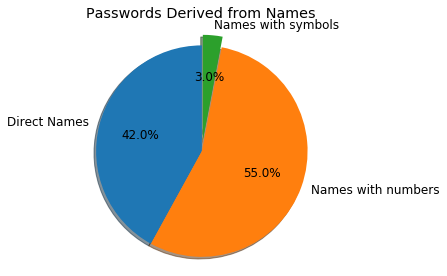

In [81]:
labels=['Direct Names','Names with numbers', 'Names with symbols']
sizes=[42,55,3]
#explode=[0.1,0.1,0.1,0.1,0.1,0.1]
explode=[0,0,0.1]
fig1, ax1=plt.subplots()
ax1.pie(sizes,explode=explode,labels=labels,autopct='%1.1f%%',shadow=True,startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
ax1.set(title='Passwords Derived from Names')
plt.tight_layout()
plt.show()

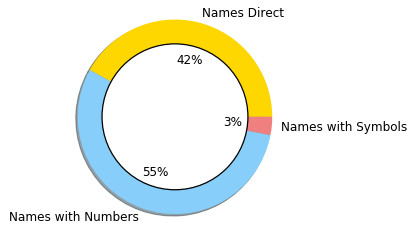

In [82]:
# The slices will be ordered and plotted counter-clockwise. 
labels = 'Names Direct', 'Names with Numbers', 'Names with Symbols' 
sizes = [42,55,3] 
colors = ['gold', 'lightskyblue','lightcoral'] 
explode = (0, 0, 0)  # explode a slice if required 
 
 
plt.pie(sizes, explode=explode, labels=labels, colors=colors, 
         autopct='%1.0f%%', shadow=True) 
          
#draw a circle at the center of pie to make it look like a donut 
centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.25) 
fig = plt.gcf() 
fig.gca().add_artist(centre_circle) 

# Set aspect ratio to be equal so that pie is drawn as a circle. 
plt.axis('equal') 
plt.show()  

### Places Percentages

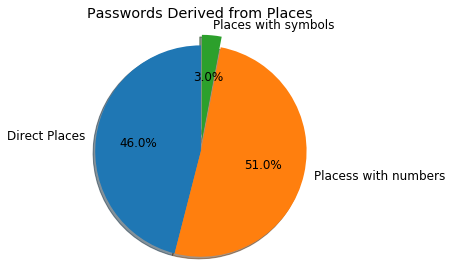

In [83]:
labels=['Direct Places','Placess with numbers', 'Places with symbols']
sizes=[46,51,3]
#explode=[0.1,0.1,0.1,0.1,0.1,0.1]
explode=[0,0,0.1]
fig1, ax1=plt.subplots()
ax1.pie(sizes,explode=explode,labels=labels,autopct='%1.1f%%',shadow=True,startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
ax1.set(title='Passwords Derived from Places')
plt.tight_layout()
plt.show()

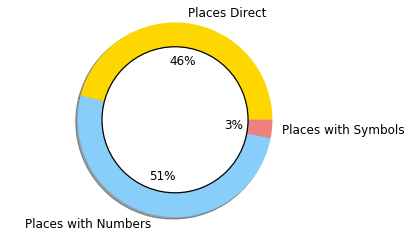

In [84]:
# The slices will be ordered and plotted counter-clockwise. 
labels = 'Places Direct', 'Places with Numbers', 'Places with Symbols' 
sizes = [46,51,3] 
colors = ['gold', 'lightskyblue','lightcoral'] 
explode = (0, 0, 0)  # explode a slice if required 
 
 
plt.pie(sizes, explode=explode, labels=labels, colors=colors, 
         autopct='%1.0f%%', shadow=True) 
          
#draw a circle at the center of pie to make it look like a donut 
centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.25) 
fig = plt.gcf() 
fig.gca().add_artist(centre_circle) 

# Set aspect ratio to be equal so that pie is drawn as a circle. 
plt.axis('equal') 
plt.show()  

In [85]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
plt.rcParams.update({'font.size': 22})

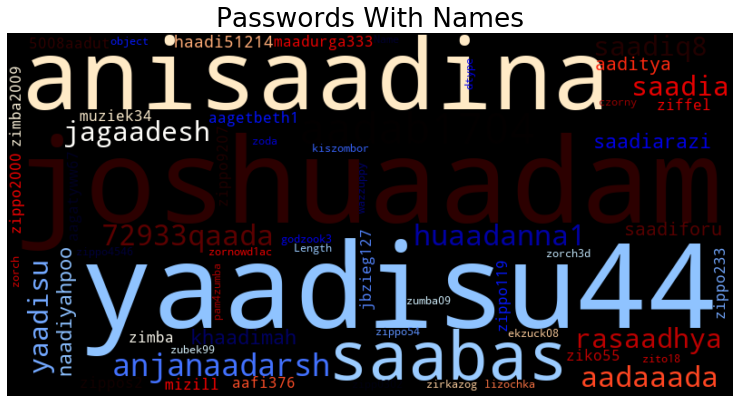

In [86]:
wc = WordCloud(background_color="black",scale =2,colormap="flag").generate(str(passwords_with_names[0]))
plt.figure(figsize=(13,8))
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.title("Passwords With Names")
plt.show()

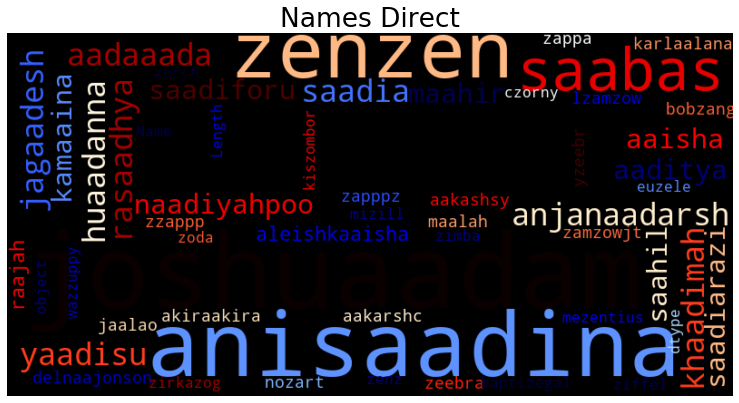

In [87]:
wc = WordCloud(background_color="black",scale =2,colormap="flag").generate(str(direct_names[0]))
plt.figure(figsize=(13,8))
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.title("Names Direct")
plt.show()

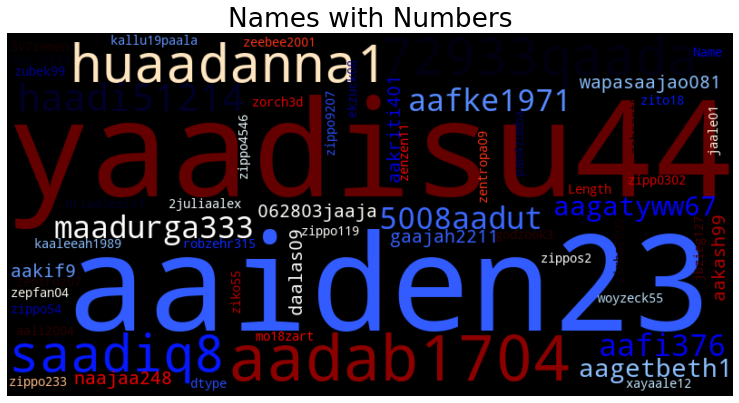

In [88]:
wc = WordCloud(background_color="black",scale =2,colormap="flag").generate(str(names_with_numbers[0]))
plt.figure(figsize=(13,8))
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.title("Names with Numbers")
plt.show()

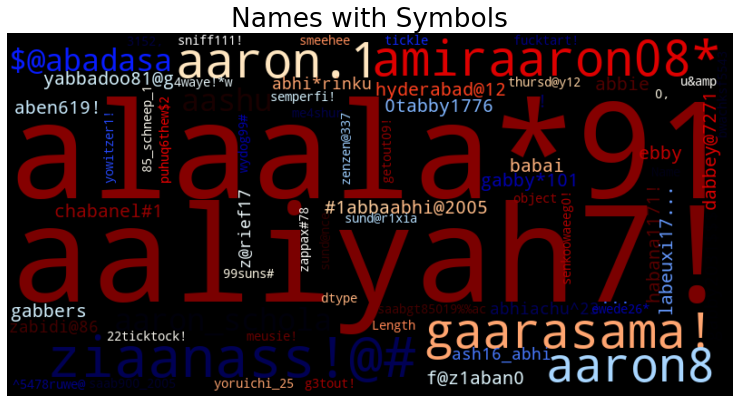

In [89]:
import string
# the regex used to detect words is a combination of normal words, ascii art, and emojis
# 2+ consecutive letters (also include apostrophes), e.x It's
normal_word = r"(?:\w[\w']+)"
# 2+ consecutive punctuations, e.x. :)
ascii_art = r"(?:[{punctuation}][{punctuation}]+)".format(punctuation=string.punctuation)
# a single character that is not alpha_numeric or other ascii printable
emoji = r"(?:[^\s])(?<![\w{ascii_printable}])".format(ascii_printable=string.printable)
regexp = r"{normal_word}|{ascii_art}|{emoji}".format(normal_word=normal_word, ascii_art=ascii_art,
                                                     emoji=emoji)
rege=r"[\w'?!@#$%^&*_}{'?'.,/]+"
wc = WordCloud(background_color="black",scale =2,colormap="flag", regexp=rege).generate(str(names_with_symbols[0]))
plt.figure(figsize=(13,8))
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.title("Names with Symbols")
plt.show()

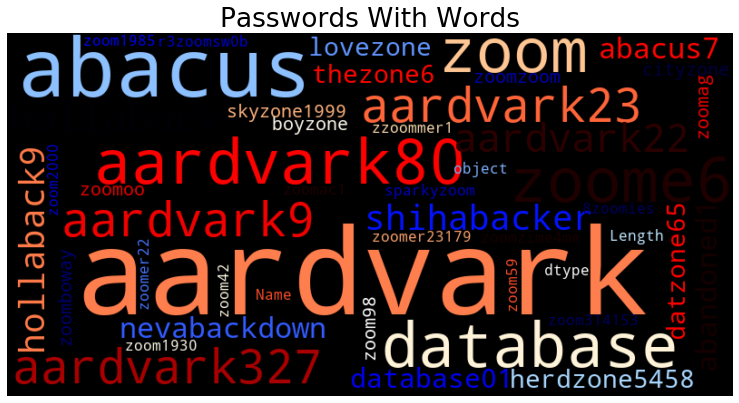

In [90]:
wc = WordCloud(background_color="black",scale =2,colormap="flag").generate(str(passwords_with_words[0]))
plt.figure(figsize=(13,8))
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.title("Passwords With Words")
plt.show()

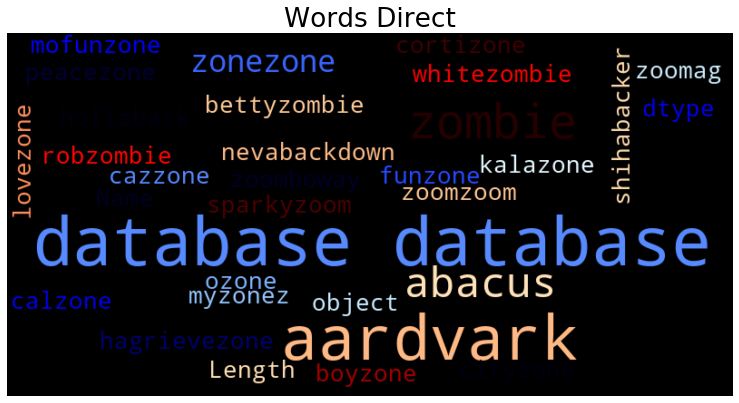

In [91]:
wc = WordCloud(background_color="black",scale =2,colormap="flag").generate(str(direct_words[0]))
plt.figure(figsize=(13,8))
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.title("Words Direct")
plt.show()

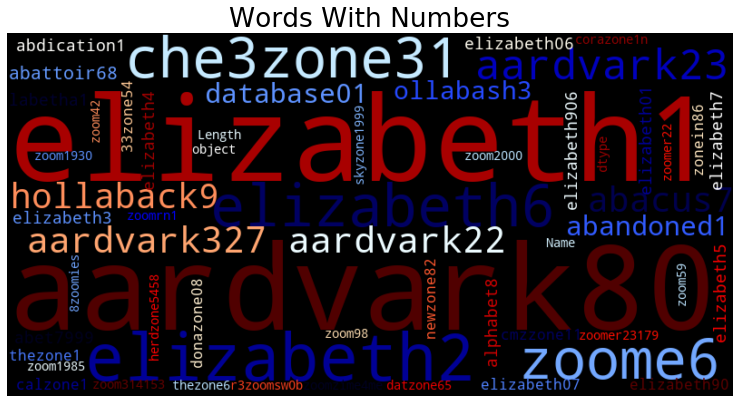

In [92]:
wc = WordCloud(background_color="black",scale =2,colormap="flag").generate(str(words_with_numbers[0]))
plt.figure(figsize=(13,8))
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.title("Words With Numbers")
plt.show()

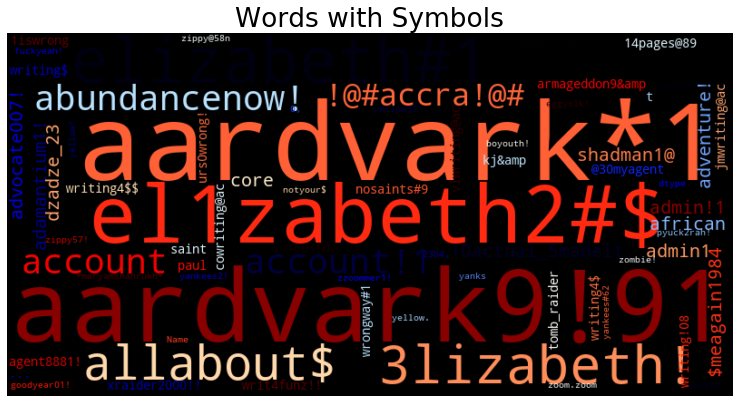

In [93]:
rege=r"[\w'?!@#$%^&*_}{'?'.,/]+"
wc = WordCloud(background_color="black",scale =2,colormap="flag", regexp=rege).generate(str(words_with_symbols[0]))
plt.figure(figsize=(13,8))
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.title("Words with Symbols")
plt.show()

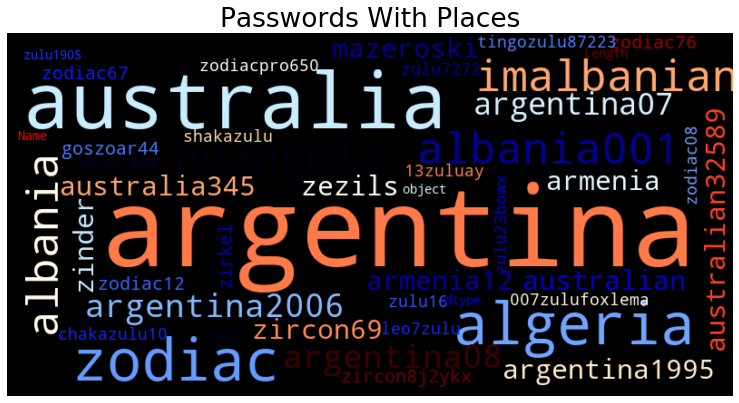

In [94]:
wc = WordCloud(background_color="black",scale =2,colormap="flag").generate(str(passwords_with_places[0]))
plt.figure(figsize=(13,8))
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.title("Passwords With Places")
plt.show()

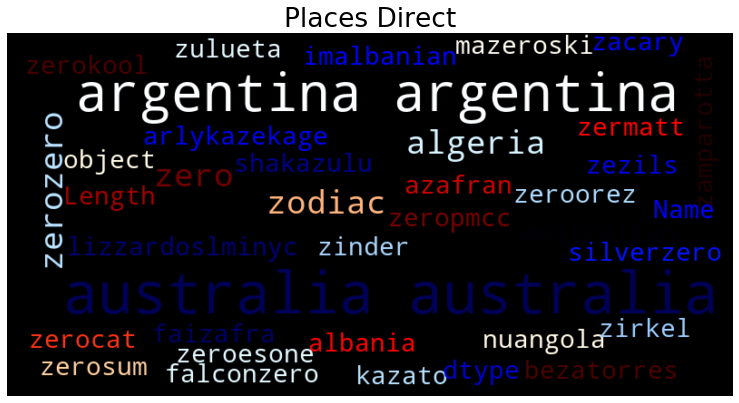

In [95]:
wc = WordCloud(background_color="black",scale =2,colormap="flag").generate(str(direct_places[0]))
plt.figure(figsize=(13,8))
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.title("Places Direct")
plt.show()

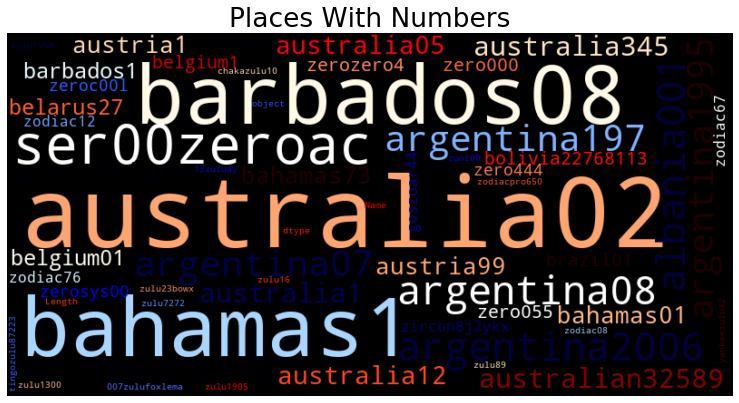

In [96]:
wc = WordCloud(background_color="black",scale =2,colormap="flag").generate(str(places_with_numbers[0]))
plt.figure(figsize=(13,8))
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.title("Places With Numbers")
plt.show()

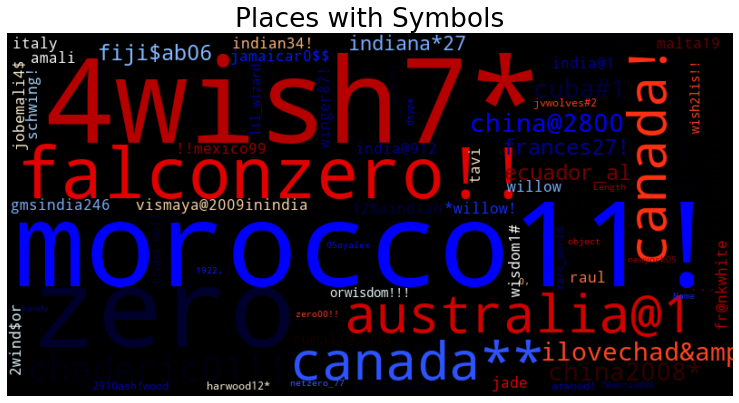

In [97]:
rege=r"[\w'?!@#$%^&*_}{'?'.,/]+"
wc = WordCloud(background_color="black",scale =2,colormap="flag", regexp=rege).generate(str(places_with_symbols[0]))
plt.figure(figsize=(13,8))
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.title("Places with Symbols")
plt.show()

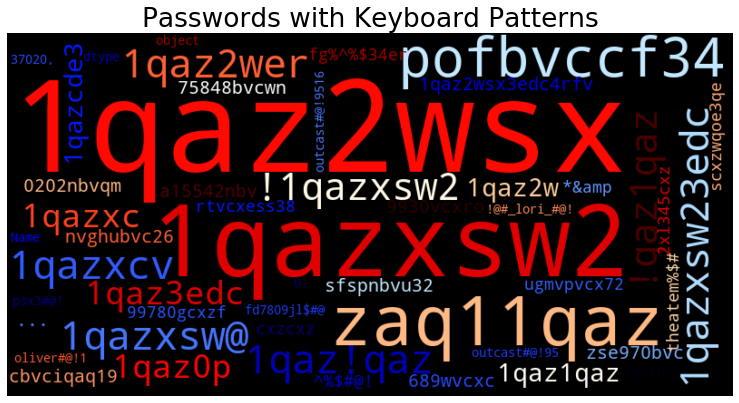

In [98]:
rege=r"[\w'?!@#$%^&*_}{'?'.,/]+"
wc = WordCloud(background_color="black",scale =2,colormap="flag",regexp=rege).generate(str(passwords_with_keys[0]))
plt.figure(figsize=(13,8))
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.title("Passwords with Keyboard Patterns")
plt.show()

In [99]:
num_passwords=numeric_passwords[0].to_frame()

In [100]:
type(direct_names)

pandas.core.frame.DataFrame

In [101]:
type(num_passwords)

pandas.core.frame.DataFrame

In [102]:
other_remaining_passwords=remaining_passwords.loc[remaining_passwords['length']>=8]
other_remaining_passwords.head()

,0,length
0,@fl!pm0de@,10
20,m8s3zen4,8
53,jmtjkbas,8
58,mjp47766,8
81,styk1965,8


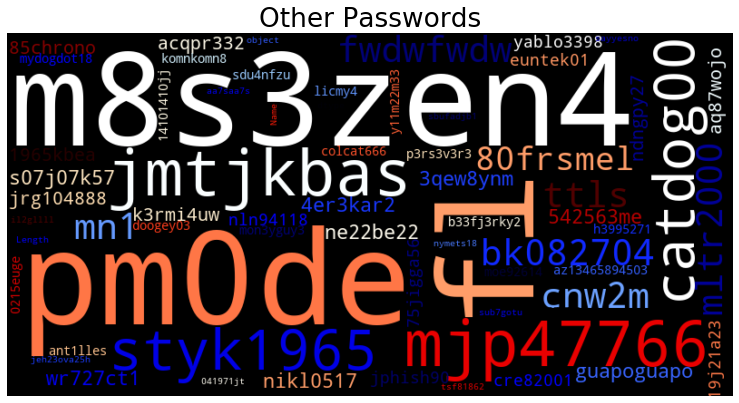

In [103]:
wc = WordCloud(background_color="black",scale =2,colormap="flag").generate(str(other_remaining_passwords[0]))
plt.figure(figsize=(13,8))
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.title("Other Passwords")
plt.show()

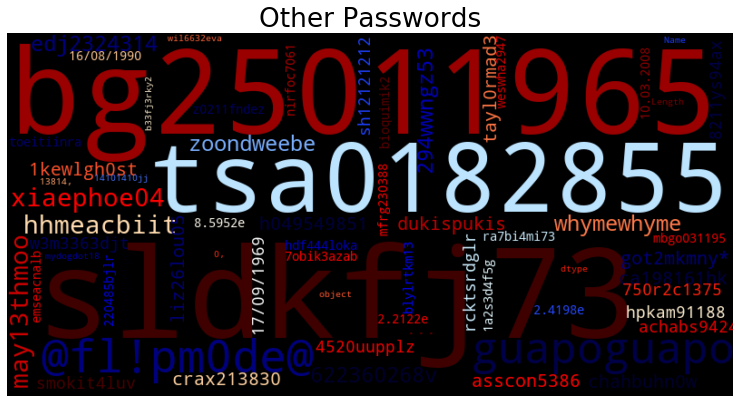

In [104]:
rege=r"[\w'?!@#$%^&*_}{'?'.,/]+"
wc = WordCloud(background_color="black",scale =2,colormap="flag",regexp=rege).generate(str(top_remaining_passwords[0]))
plt.figure(figsize=(13,8))
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.title("Other Passwords")
plt.show()